<a href="https://colab.research.google.com/github/azma78699/Credit_Card_Fraud_Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **YBI FOUNDATION MACHINE LEARNING INTERN**

 **Author:Mohammed Zaheer Unnisa**

 **Batch : 19th September**

 **Project : "Credit Card Fraud Detection"**

 **DatasetLink**:https://www.dropbox.com/s/6qcgvoc6h8y8zb2/CreditCardDefault.csv?dl=1



In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [ ]:
credit=pd.read_csv('https://www.dropbox.com/s/6qcgvoc6h8y8zb2/CreditCardDefault.csv?dl=1')

In [ ]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit.shape

(284807, 31)

In [ ]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit.isnull().sum()

In [ ]:
data.isnull().values.any()

In [ ]:
df.nunique()

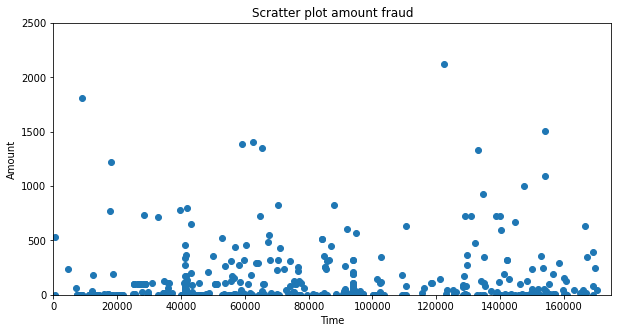

In [ ]:
credit_fraud = credit[credit['Class'] == 1]
plt.figure(figsize=(10,5))
plt.scatter(credit_fraud['Time'], credit_fraud['Amount']) # Display fraud amounts according to their ti
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
big_fraud = credit_fraud[credit_fraud['Amount'] > 1000].shape[0]
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(big_fraud),str(credit_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
number_fraud = len(credit[credit.Class == 1])
number_no_fraud = len(credit[credit.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))


There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))


The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [ ]:
credit_corr = credit.corr()


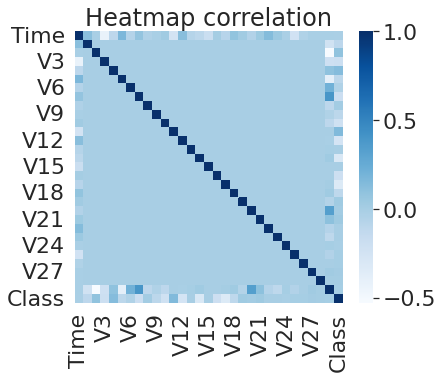

In [ ]:
plt.figure(figsize=(6,5))
seaborn.heatmap(credit_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
credit_train_all = credit[0:150000]
credit_train_1 = credit_train_all[credit_train_all['Class'] == 1] # Fraud
credit_train_0 = credit_train_all[credit_train_all['Class'] == 0] # Non Fraud
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(credit_train_1)))

credit_sample=credit_train_0.sample(300)
credit_train = credit_train_1.append(credit_sample)
credit_train = credit_train.sample(frac=1)

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = credit_train.drop(['Time', 'Class'],axis=1)
y_train = credit_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
credit_test_all = credit[150000:]

X_test_all = credit_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = credit_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1']) # Binary label

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our da

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
prediction_SVM = classifier.predict(X_train)

NameError: ignored

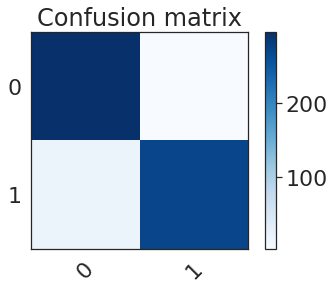

In [ ]:
cm = confusion_matrix(y_train, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('We have detected {} frauds / {} total frauds.'.format(str(cm[1][1]),str(cm[1][1]+cm[1][0])))
print('\nSo, the probability to detect a fraud is {}'.format(str(cm[1][1]/(cm[1][1]+cm[1][0]))))
print("the accuracy is : {}".format(str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])))))

